# Homework 2

This is a homework assignment on the material from the 6th-9th classes. The deadline for submission is __23:59 on October 29__.

- The homework is done in the same Jupyter Notebook.

- The file should be renamed: __Group Number_First Name_Last Name__ (no spaces at the beginning or end). Example: __000_Ivan_Ivanov__.

- Homework should be sent to __OptimizationHomework@yandex.ru__. Subject line: __Innopolis_Task number__ (without spaces at the beginning and end). For this assignment, the subject line is: __Innopolis_2__.

- Place the solution to each problem/item after the condition.

- Do not forget to add necessary explanations and comments.

- All technical artifacts should be removed in the final version that will be sent for checking. By such artifacts we mean any cell outputs that are not commented in any way in the text, as well as any bulk/long technical output (even if it is commented in the text).

- A full run of the solution (Kernel -> Restart & Run All) should run all cells without errors.

- The maximum score for the assignment is 100.

We wish you success!

### Part 1. Solving the unconstrained optimization problem

Consider the problem of empirical risk minimization:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
where $\ell$ is the loss function, $g$ is the model, $w$ is the model parameters, $\{x_i, y_i\}_{i=1}^n$ is the data sample from feature vectors $x_i$ and labels $y_i$, $\lambda > 0$ is the regularization parameter.

We use the linear model $g(w, x) = w^T x$ and the logistic/sigmoidal loss function: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Important: $y$ must take values $-1$ or $1$__). The resulting problem is called a logistic regression problem. 

__Problem 1. (20 points)__ Let us do some preparation work. 

__а). (15 points)__ Write out the gradient and the Hessian for this problem. Is the problem convex? Is $\mu$ strongly convex? If so, how can $\mu$ be estimated? Estimate the Lipschitz constant of the gradient $L$. $\textbf{Comment : 15 points}$

\begin{equation}
f(x) = \frac{1}{n} \sum\limits_{i=1}^n \ln (1 + e^{-y_iw^Tx_i}) + \frac{\lambda}{2} \| w \|^2_2
\end{equation}
First, calculate the gradient
\begin{equation}
\nabla ||w||^2_2 = 2w
\end{equation}
\begin{equation}
\nabla \ln(z) = \frac{\nabla z}{z}
\end{equation}
\begin{equation}
\nabla e^{-y_iw^Tx_i} = e^{-y_iw^Tx_i} \nabla (-y_iw^Tx_i)
\end{equation}
\begin{equation}
\nabla (-y_iw^Tx_i) = -y_i x_i
\end{equation}
\begin{equation}
\implies\nabla f(x) = \frac{1}{n} \sum\limits_{i=1}^n \frac{1}{1 + e^{-y_iw^Tx_i}} \ast e^{-y_iw^Tx_i} \ast (-y_ix_i) + \lambda w\
\end{equation}

Multiplying by $e^z$, we obtain
\begin{equation}
\frac{e^{-z}}{1 + e^{-z}} = \frac{1}{e^{z} + 1}
\end{equation}

\begin{equation}
\implies \nabla f(x) = -\frac{1}{n} \sum\limits_{i=1}^n \frac{y_ix_i}{1 + e^{y_iw^Tx_i}} + \lambda w
\end{equation}

---------------------------------------------
Next, lets find Hessian
\begin{equation}
\nabla \frac{1}{z} = \frac{-\nabla z}{z^2}
\end{equation}
\begin{equation}
\implies H = -\frac{1}{n} \sum\limits_{i=1}^n y_i x_i \frac{-e^{y_iw^Tx_i}}{(1 + e^{y_iw^Tx_i})^2}y_i x_i^T + \lambda I = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 x_i x_i^T}{(1 + e^{y_iw^Tx_i})(1 + e^{-y_iw^Tx_i})} + \lambda I = \frac{1}{n} \sum\limits_{i=1}^n \frac{ x_i x_i^T}{(1 + e^{y_iw^Tx_i})(1 + e^{-y_iw^Tx_i})} + \lambda I
\end{equation}

---------------------------------------------
Next, lest find whether this problem is convex and $\mu$ strongly convex. For this, I will use [Rayleigh quotient](https://en.wikipedia.org/wiki/Rayleigh_quotient). It says, that for any symmetric matrix M, Rayleight quotient $\frac{x^*Mx}{x^*x} = u^*Mu$ is in range $[\lambda_{min}, \lambda_{max}]$, where $u$ is unit vector and $\lambda$ is eigenvalue. \
Since Hessian is symmetric, we can obtain its smallest eigenvalue by Rayleigh quotient assuming u to be real.\
\begin{equation}
R = u^THu = z^T(\frac{1}{n}\sum\limits_{i=1}^n \sigma x_i x_i^T + \lambda I)z, \sigma = \frac{1}{(1 + e^{y_iw^Tx_i})(1 + e^{-y_iw^Tx_i})}
\end{equation}

Note that $\sigma$ is composed by multiplication of two sigmoid functions >=0. So, $\sigma$ >=0\
\begin{equation}
R = u^THu = \frac{1}{n}\sum\limits_{i=1}^n \sigma z^T x_i x_i^Tz + z^T\lambda Iz = \frac{1}{n}\sum\limits_{i=1}^n \sigma (z^T x_i)^2 + \lambda \ge \lambda
\end{equation}

We see that R is bounded below by $\lambda$, so since $\lambda_{min}(eigenvalue) = \lambda (regularization) > 0$, our problem is always convex and $\mu$-strongly convex with $\mu = \lambda$

----------------------------------------
Finally, lets Estimate L of gradient that is (by previous homework) the largest singular value of H, that is the spectral norm of H. Since hessian is symmetric, L is the largest eigenvalue of Hessian.\
$\sigma = \frac{1}{(1 + e^{y_iw^Tx_i})(1 + e^{-y_iw^Tx_i})} \le \frac{1}{4}$ just by derivative \
Using triangle property we have:
\begin{equation}
||H||_2 = ||\frac{1}{n}\sum\limits_{i=1}^n \sigma x_i x_i^T + \lambda I||_2 \le \frac{1}{4n}||\sum\limits_{i=1}^n x_i x_i^T||_2 + \lambda ||I||_2 \le \frac{1}{4n}\sum\limits_{i=1}^n ||x_i x_i^T||_2 + \lambda
\end{equation}

since $x_i x_i^T$ is outer product that is symmetric with rank 1, it has only one non zero eigen value (singular value) equal to $x_i^Tx_i = ||x_i||_2^2$ since $Ax_i=x_i(x_i^Tx_i)=(x_i^Tx_i)x_i$. 
\begin{equation}
\frac{1}{4n}\sum\limits_{i=1}^n ||x_i x_i^T||_2 + \lambda = \frac{1}{4n}\sum\limits_{i=1}^n ||x_i||_2^2 + \lambda
\end{equation}

So, Lipschitz constant is $\frac{1}{4n}\sum\limits_{i=1}^n ||x_i||_2^2 + \lambda$

The _mushrooms_ dataset is attached. Use the following code to generate a matrix $X$ and vector $y$, which will store the sample $\{x_i, y_i\}_{i=1}^n$:

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from tqdm import tqdm
sns.set_theme()

In [2]:
dataset = "mushrooms.txt" 
#the file must be in the same directory as notebook.

In [3]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Let us change the vector $y$ so that $y_i$ takes values $-1$ and $1$. You can also do additional preprocessing of the data (with techniques from machine learning), but this is not additionally assessed in any way.

In [4]:
y = 2 * y - 3

Let us divide the data into two parts: training and test.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_test.shape, y_test.shape

((1625, 112), (1625,))

__b). (5 points)__ For the training part $X_{train}$, $y_{train}$, estimate the constant $L$. Set $\lambda$ such that $\lambda \approx L / 1000$.  Realize in the code the calculation of the value, gradient and Hessian for our target function ($X$, $y$, $\lambda$ should be given as a parameter so that it is possible to change them, not only to substitute fixed $X_{train}$, $y_{train}$). $\textbf{Comment : 4 points}$

Here is the computation of lipschitz constant

In [9]:
sum = 0
for i in range(X_train.shape[0]):
    sum += np.linalg.norm(X_train[i])**2
sum = sum / 4 / X_train.shape[1]
print(f"Lipschitz constant is {sum} + lambda")

Lipschitz constant is 304.640625 + lambda


$\textbf{Comment : It's too big Lipschitz constant, it should be 5-10}$

Now estimate the $\lambda$ such that $\lambda \approx \frac{L}{1000}$\
$\frac{304.640625 + \lambda}{1000} = \lambda \implies \lambda \approx 0.3049$

Next is calculation of target function, gradient and hessian

In [10]:
lam = 0.3049
L = 304.640625 + lam

In [11]:
def f(X : np.ndarray, y : np.ndarray, w : np.ndarray):
    n = X.shape[0]
    f = 0
    for i in range(n):
        f += np.log(1 + np.exp(-y[i] * (w.transpose() @ X[i])))
    return f / n + 0.5 * lam * np.linalg.norm(w)**2

In [12]:
def grad(X : np.ndarray, y : np.ndarray, w : np.ndarray):
    n = X.shape[0]
    gr = np.zeros(X.shape[1]).reshape(-1,1)
    for i in range(n):
        gr += (y[i] * X[i].reshape(-1,1)) / ( 1 + np.exp(y[i] * (w.transpose() @ X[i])))
    return -gr / n + lam * w

In [13]:
def hessian(X : np.ndarray, y : np.ndarray, w : np.ndarray):
    # x_i is vector, w is column vector
    n = X.shape[0]
    d = X.shape[1] # number of features
    hes = np.zeros((X.shape[1], X.shape[1]))
    for i in range(n):
        
        val = (X[i].reshape(-1, 1) @ X[i].reshape(1, -1)) 
        val = val / ( 1 + np.exp(y[i] * (w.transpose() @ X[i])))
        val = val / ( 1 + np.exp(-y[i] * (w.transpose() @ X[i])))
        hes += val
    return hes / n + lam * np.eye(d)

In [36]:
w_0 = np.ones((X_train.shape[1], 1)) # start point for all the algorithms
norm_nabla_at_0 = np.linalg.norm(grad(X_train, y_train, w_0))

__Problem 2. (20 points)__ This part of the assignment is related to momentum and acceleration.

__a). (5 points)__ Implement the heavy ball method and Nesterov's accelerated gradient method. 

Just in case, we give here a variant of the function description for the gradient descent from the first assignment. You can use this format if you wish. Note that ``x_sol`` occurs in the code - this problem should be solved or criteria tied to ``x_sol`` should not be used. $\textbf{Comment : 5 points}$

In [27]:
def heavy_ball_constant_momentum(f, nabla_f, w_0 : np.ndarray, step,  momentum,
                     K = 100, eps = 1e-5):
    '''
        f - target function
        nabla_f - gradient of the target function
        x_0 - start point
        step - step size. constant
        momentum - function for calculating the momentum
        K - number of iterations 
        eps - error to achieve

        The function returns the point at which the minimum is reached and the error vector
    '''
    w_k = w_0.copy()
    w_min1 = w_0.copy()
    losses = []
    for k in range(K):
        w_saved_k = w_k.copy() #to set as previous
        w_k -= step * nabla_f(X_train, y_train, w_k) - momentum * (w_k - w_min1)
        w_min1 = w_saved_k
        
        loss = np.linalg.norm(w_k - w_saved_k)
        losses.append(loss)
        if(loss < eps):
            break
        if loss > 1000:
            break
            
    return w_0, losses

def heavy_ball_iter_momentum(f, nabla_f, w_0 : np.ndarray,  step,  constant,
                     K = 100, eps = 1e-5):
    '''
        f - target function
        nabla_f - gradient of the target function
        x_0 - start point
        step - step size. constant
        constant - What constant to add to iteration number in denominator. ex: for 5 momentum is k / (k + 5)
        K - number of iterations (by default 1e3)
        eps - accuracy (by default 1e-5)

        The function returns the point at which the minimum is reached and the error vector
    '''
    w_k = w_0.copy()
    w_min1 = w_0.copy()
    losses = []
    for k in range(K):
        w_saved_k = w_k.copy() #to set as previous
        w_k -= step * nabla_f(X_train, y_train, w_k) - (k / (k+constant)) * (w_k - w_min1)
        w_min1 = w_saved_k
        
        loss = np.linalg.norm(w_k - w_saved_k)
        losses.append(loss)
        if(loss < eps):
            break
        if loss > 1000:
            break
            
    return w_0, losses

In [19]:
def nesterov_constant(f, nabla_f, w_0 : np.ndarray, step, momentum, K = 100, eps = 1e-5 ):
    x = w_0.copy()
    y = w_0.copy()
    losses = []
    for k in range(K):
        grad = nabla_f(X_train, y_train, y)
        x_saved = x.copy()
        x = y - step * grad
        y_new = x + momentum * (x - x_saved)
        
        loss = np.linalg.norm(y_new - y)
        y = y_new
        losses.append(loss)
        
        if(loss < eps):
            break
        if (loss > 1000):
            break 
            
    return y, losses
    
def nesterov_iter(f, nabla_f, w_0 : np.ndarray, step, constant, K = 100, eps = 1e-5 ):
    x = w_0.copy()
    y = w_0.copy()
    losses = []
    for k in range(K):
        grad = nabla_f(X_train, y_train, y)
        x_saved = x.copy()
        x = y - step * grad
        y_new = x + (k / (k + constant)) * (x - x_saved)
        
        loss = np.linalg.norm(y-y_new)
        y = y_new
        losses.append(loss)
        
        if(loss < eps):
            break
        if (loss > 1000):
            break 
    return y, losses

__b). (15 points)__ Solve an optimization problem on a train sample using two implemented methods. Fix a step $\frac{1}{L}$ and search different values of momentum from $-1$ to $1$. Check also the momentum values equal to $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ is the iteration number), and if the target function is strongly convex, also $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. You can choose your own starting point and convergence criterion; we recommend using the normalized version of the criterion, for example, $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$, as well as using the same starting point and convergence criterion in Problems 3-4.

In this task, you should draw three plots: 1) the convergence criterion values from iteration number for the heavy ball method with different values of momentum, 2) the convergence criterion values from iteration number for the accelerated gradient method with different values of momentum, and 3) the convergence criterion values from iteration number for the two methods with the best choice of momentum for each, as well as the gradient descent.

Remember to make conclusions and comment on the results. For example, reflect on whether convergence is always monotone. $\textbf{Comment : 10 points}$

In [47]:
hard_step = (np.sqrt(L) - np.sqrt(lam)) / (np.sqrt(L) + np.sqrt(lam))
hard_step

0.938697576054154

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:29<00:00,  9.79s/it]


Text(0.5, 1.0, 'Heavy ball')

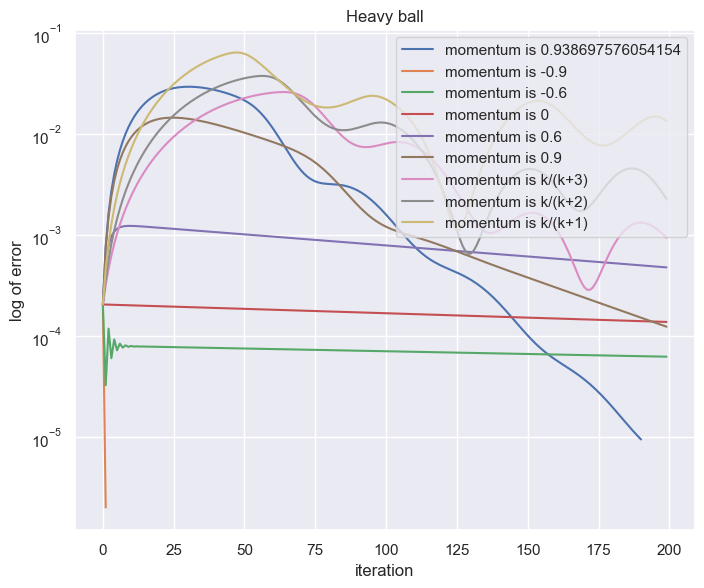

In [59]:
momentums = [hard_step, -0.9, -0.6, 0, 0.6, 0.9]
constants = [3,2,1]

# Heavy ball with different momentums: constant, 3 of k and hard one
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(8)
fig.set_figheight(6.5)

errors_heavy_ball = []
for mom in tqdm(momentums):
    _, losses = heavy_ball_constant_momentum(f, grad, w_0, 1 / L, mom, K = 200)
    errors_heavy_ball.append(losses)
    ax.plot(range(len(losses)), losses)
    
for c in tqdm(constants):
    _, losses = heavy_ball_iter_momentum(f, grad, w_0, 1 / L, c, K = 200)
    errors_heavy_ball.append(losses)
    ax.plot(range(len(losses)), losses)
    
ax.legend([f"momentum is {mom}" for mom in momentums] + ["momentum is k/(k+3)","momentum is k/(k+2)","momentum is k/(k+1)"],
         loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("log of error")
ax.set_yscale("log")
ax.set_title("Heavy ball")

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:28<00:00,  9.37s/it]


Text(0.5, 1.0, 'Nesterov acceleration')

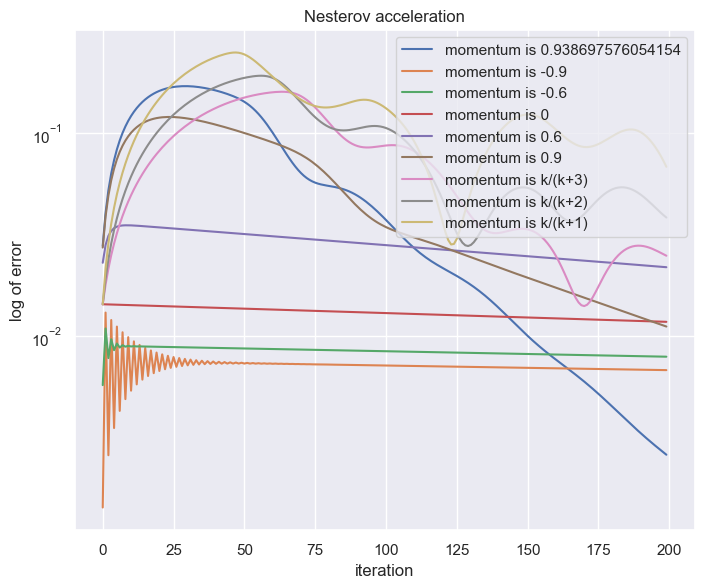

In [61]:
momentums = [hard_step, -0.9, -0.6, 0, 0.6, 0.9]
constants = [3,2,1]

# Heavy ball with different momentums: constant, 3 of k and hard one
errors_nesterov = []
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(8)
fig.set_figheight(6.5)
for mom in tqdm(momentums):
    _, losses = nesterov_constant(f, grad, w_0, 1 / L, mom, K = 200)
    errors_nesterov.append(losses)
    ax.plot(range(len(losses)), losses)
    
for c in tqdm(constants):
    _, losses = nesterov_iter(f, grad, w_0, 1 / L, c, K = 200)
    errors_nesterov.append(losses)
    ax.plot(range(len(losses)), losses)
    
ax.legend([f"momentum is {mom}" for mom in momentums] + ["momentum is k/(k+3)","momentum is k/(k+2)","momentum is k/(k+1)"],
         loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("log of error")
ax.set_yscale("log")
ax.set_title("Nesterov acceleration")

Text(0.5, 1.0, 'HB vs nesterov')

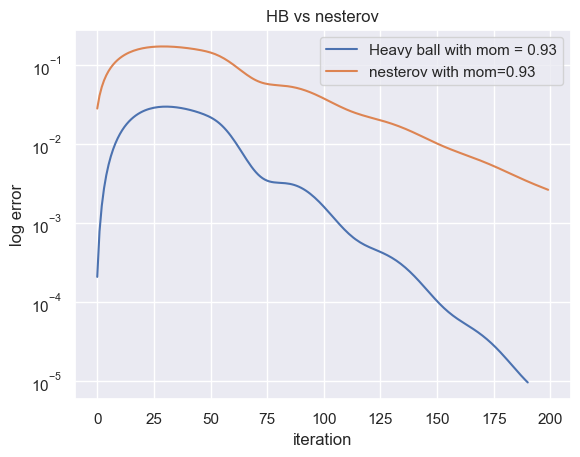

In [62]:
ax = plt.subplot()
plt.plot(range(len(errors_heavy_ball[0])), errors_heavy_ball[0])
plt.plot(range(len(errors_nesterov[0])), errors_nesterov[0])
ax.legend(["Heavy ball with mom = 0.93", "nesterov with mom=0.93"])
ax.set_xlabel("iteration")
ax.set_ylabel("log error")
ax.set_yscale("log")
ax.set_title("HB vs nesterov")

$\textbf{Comment : Very strange plots. Why on start you go up? Why plots start from different points? Why started ponts too small?}$

### Conclusions

We see that:
1. in both methods it takes a lot of time to converge, the rate is low. (except the case when momentum is -0.9 for HB when convergence was in 1 iteration, but I think this is the coincidence that should be rated as perfect parameter)
2. The only one way to define momentum and have +- good convergence is the $\frac{\sqrt(L) - \sqrt(\mu)}{\sqrt(L) + \sqrt(\mu)}$
3. With best momentum, heavy ball method showed the best performance
4. when using iterative momentum, algorithm even a little bit diverges from time to time. When using high value of constant momentum algo also diverges sometimes.
5. All the next methods are much much better than this one
6. Nesterov with very low momentum started to oscilate

__Problem 3. (30 points)__ In this part, we work with the conjugate gradient method. 

__а). (5 points)__ Realize the Fletcher-Reeves and Polak-Ribier method. Describe how you will search for $\alpha_k$ steps (both the algorithm and its initialization are interesting). Add to the algorithms the ability to do "restarts" (sometimes take $\beta_k = 0$) with some frequency that can be customized. $\textbf{Comment : 5 points}$

In [24]:
def line_search(f, grad, x_0, p, max_its = 10):
    '''
    wolfe conditions. Searching for such alpha that wolfe conditions are met
    f - function to use
    x_0 - starting point
    p - direction of searching
    grad - gradient function
    '''
    a = 1
    c1 = 1e-3
    c2 = 0.9 
    fx = f(X_train, y_train, x_0) # function value in the point we are in
    x_k = x_0 + a * p # proposed point
    grad_0 = grad(X_train, y_train, x_0) # gradient in the point we are located
    grad_k = grad(X_train, y_train, x_k) # gradient in the point we propose as the next
    its = 0
    while f(X_train, y_train,x_k) > fx + (c1*a*grad_0.T@p) or -grad_k.T@p > -c2*grad_0.T@p : # while wolfe conditions are not met
        its +=1
        if its > max_its:
            break
        a *= 0.5 # update alpha
        x_k = x_0 + a * p #update proposed value
        grad_k = grad(X_train, y_train, x_k) #update gradient at proposed point
    return a

In [29]:
def fletcher_reeves(f, nabla, w_0 : np.ndarray, K = 1000, eps = 10**-5, restart_frequency = 5):
    '''
    f - function to minimize
    nabla - gradient function
    w_0 - start point
    K - number of iterations
    eps - error to achieve
    restart_frequency - number of iterations to restart after.
    '''
    w_k = w_0.copy()
    p_k = -nabla(X_train, y_train, w_k)
    beta = None
    errors=[]
    for k in tqdm(range(K)):
        alpha = line_search(f, nabla, w_k, p_k) # line search for alpha using wolfe
        grad_at_w = nabla(X_train, y_train, w_k)
        w_new = w_k + alpha * p_k
        grad_at_w_new = nabla(X_train, y_train, w_new)
        beta = 0 if (k !=0 and k%restart_frequency == 0) else ( np.dot(grad_at_w_new.T,grad_at_w_new) / np.dot(grad_at_w.T, grad_at_w) )
        p_k = -grad_at_w_new + beta * p_k

        error = np.linalg.norm(w_new - w_k)
        
        errors.append(error)
        w_k = w_new
        if error < eps:
            break
        if error > 1000:
            break
    return w_k, errors

In [30]:
def polak_ribier(f, nabla, w_0 : np.ndarray, K = 1000, eps = 10**-5, restart_frequency = 5):
    '''
    f - function to minimize
    nabla - gradient function
    w_0 - start point
    K - number of iterations
    eps - error to achieve
    restart_frequency - number of iterations to restart after.
    '''
    w_k = w_0.copy()
    p_k = -nabla(X_train, y_train, w_k)
    beta = None
    errors=[]
    for k in tqdm(range(K)):
        alpha = line_search(f, nabla, w_k, p_k) # line search for alpha using wolfe
        grad_at_w = nabla(X_train, y_train, w_k)
        w_new = w_k + alpha * p_k
        grad_at_w_new = nabla(X_train, y_train, w_new)
        beta = 0 if (k !=0 and k%restart_frequency == 0) else ( np.dot(grad_at_w_new.T,grad_at_w_new - grad_at_w) / np.dot(grad_at_w.T, grad_at_w) )
        p_k = -grad_at_w_new + beta * p_k

        error = np.linalg.norm(w_new - w_k)
        errors.append(error)
        w_k = w_new
        if error < eps:
            break
        if error > 1000:
            break
    return w_k, errors

__b). (10 points)__ Solve the optimization problem with two implemented methods, varying the frequency of "restarts" for each: $1$ (every iteration $\beta_k = 0$), $10$ (every tenth iteration $\beta_k = 0$), $100$, $1000$, no restarts.

Draw three plots: 1) the convergence criterion values from iteration number for the Fletcher-Reeves method with different restart frequencies, 2) the convergence criterion values from iteration number for the Polak-Ribier method with different restart frequencies, 3) the convergence criterion values from iteration number for both methods with the best choice of restart frequency. Make a conclusion. $\textbf{Comment : 10 points}$

 28%|██████████████████████▋                                                          | 28/100 [00:07<00:19,  3.64it/s]


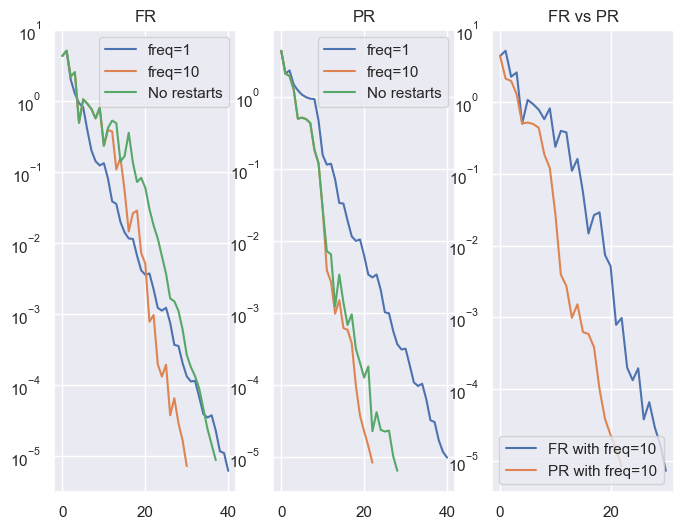

In [45]:
freqs = [1,10,101] # 1,10 and no restarts. did not put 100 and 1000 here because algorithm converged faster
fig, (ax1,ax2, ax3)= plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(8)

errors_FR = []
for freq in freqs:
    w_k , errors = fletcher_reeves(f, grad, w_0, K=100, restart_frequency = freq)
    errors_FR.append(errors)
    ax1.plot(range(len(errors)), errors)
    ax1.set_yscale("log")
    ax1.set_title("FR")
    
ax1.legend(["freq=1","freq=10","No restarts"])

errors_PR = []
for freq in freqs:
    w_k , errors = polak_ribier(f, grad, w_0, K = 100, restart_frequency = freq)
    errors_PR.append(errors)
    ax2.plot(range(len(errors)), errors)
    ax2.set_yscale("log")
    ax2.set_title("PR")
    
ax2.legend(["freq=1","freq=10","No restarts"])

ax3.plot(range(len(errors_FR[1])), errors_FR[1])
ax3.plot(range(len(errors_PR[1])), errors_PR[1])

ax3.set_yscale("log")
ax3.set_title("FR vs PR")
ax3.legend(["FR with freq=10","PR with freq=10"])

### Conclusion
Ftetcher-reeves algorithm, as polak-ribier algorithm, converged faster when restart frequency was equal to 10.\
We see that with best parameters, Polar-Ribier converged faster than Fletcher-Reeves.\
Also we see that PR algorithm is generally more smooth, has less spikes than FR.\
PR algorithm has problems when we have restarts every iteration unlike FR

__c). (15 points)__ In this part we abstract from the regression problem. Let us study the properties of the conjugate gradient method for the quadratic problem:
$$\min_{x \in \mathbb{R}^d} \left[\tfrac{1}{2} x^T A x - b x \right]$$
with a positive definite symmetric matrix $A \in \mathbb{R}^{d \times d}$ and some vector $b \in \mathbb{R}^d$. We need to learn how to generate a matrix $A$ with the possibility to specify its spectrum (eigenvalues). The previous assignment already asked us to do this. We suggest the following approach based on the decomposition $A = Q D Q^T$, where $D$ is a diagonal matrix formed from eigenvalues and $Q$ is orthogonal (it can be generated using the $QR$-decomposition of a random matrix).

Suppose we have a quadratic problem whose matrix $A \in \mathbb{R}^{d \times d}$ has clustered eigenvalues, meaning, that there exists some number of clusters $k \leq d$ and values $\tilde \lambda_1 < \ldots < \tilde \lambda_k$ such that for any $\lambda_i$ eigenvalue of matrix $A$ there exists $j \leq k$ such that $\lambda_i \in [(1 - p) \tilde \lambda_j; (1 + p) \tilde \lambda_j]$, where $p < 1$.

Then we will need to generate clustered eigenvalues and then the matrix $A$. When generating the spectrum, try to make sure that all values in it are different. As a convergence criterion, use $\frac{\| x^k - x^* \|^2_A} {\| x^0 - x^* \|^2_A}$, where $k$ is the iteration number and $\| x \|^2_A = \langle x, Ax \rangle$. 

Let us test the performance of the conjugate gradient method for different variants of eigenvalue clustering:

1) Let $d = 100$, $k = 2$, $p = 0.05$, $\tilde \lambda_1 = 1$, there are 50 eigenvalues each in the clusters for $\tilde \lambda_1$ and $\tilde \lambda_2$. Vary the value of $\tilde \lambda_2$ from $10$ to $10^5$ (5 different values is enough). Plot the values of the convergence criterion from the iteration number for each value of $\tilde \lambda_2$ on one plot. Make a conclusion.

2) Let $d = 100$, $k = 2$, $p = 0.05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_2 = 1000$. Vary the number of eigenvalues in each cluster from $1$ to $99$ (5 different values is enough). Plot the values of the convergence criterion from the iteration number for each value of cluster size for $\tilde \lambda_1$ on one plot. Make a conclusion.

3) Let $d = 100$, $p = 0.05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_k = 1000$. Vary the number of clusters $k$ from 2 to 100 (5 different values is enough, include 100 - corresponds to a uniform distribution of eigenvalues). Plot the values of the convergence criterion from the number of iterations for each value of $k$ on one plot. Make a conclusion.

$\textbf{Comment : 15 points}$

In [8]:
from scipy.stats import ortho_group
import numpy as np

In [47]:
def generate_A(d : int, eigen_values):
    Q = ortho_group.rvs(d)
    A = Q @ np.diag(np.flip(eigen_values)) @ Q.T
    return A

In [10]:
def generate_b(d : int):
    return 4 * np.random.rand(d)

In [11]:
def generate_eigen_values(mid,p, count):
    # This function returns the cluster of eigenvalues around *mid* 
    # Formula is generating number from 0 to 1, multiplies by (b-a) = (2*p*alpha_tilda) and adds lower bound
    return np.random.random(count)*2*p*mid + (1-p)*mid

In [86]:
def conjugate_for_quadratic(f, grad, x_0, x_sol, A,  K = 100, eps = 1e-8 ):
    x_k = x_0.copy()
    r_k = grad(x_k)
    p_k = - r_k
    errors = [((x_k - x_sol).T @ A @ (x_k - x_sol)) / ((x_0 - x_sol).T @ A @ (x_0 - x_sol))]
    for k in range(K):
        alpha = np.dot(r_k, r_k) / (p_k.T @ A @ p_k)
        x_k = x_k + alpha * p_k
        r_k_new = r_k + alpha * A @ p_k
        beta = np.dot(r_k_new, r_k_new) / np.dot(r_k, r_k)
        r_k = r_k_new
        p_k = -r_k + beta * p_k

        error = ((x_k - x_sol).T @ A @ (x_k - x_sol)) / ((x_0 - x_sol).T @ A @ (x_0 - x_sol))
        errors.append(error)
        if error > 100:
            break
        if error < eps:
            break
    return x_k, errors

Here is the first experiment where I will vary the center of the second cluster.

Text(0.5, 1.0, 'Logarithmic Error plots for CG in part 1')

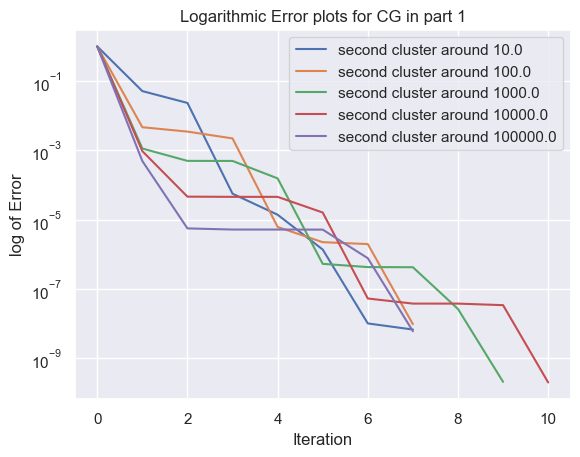

In [89]:
# Case 1. vary the upper bound of eigen values middle of clusters
# Constants
d = 100
lower_bound = 1
upper_bounds = [1e1,1e2,1e3,1e4,1e5]
p = 0.05

x_0 = np.random.rand(d)*4
for i, upper_bound in enumerate(upper_bounds):
    eigen_values = np.array([])
    eigen_values = np.append(eigen_values, generate_eigen_values(lower_bound, p, 50))
    eigen_values = np.append(eigen_values, generate_eigen_values(upper_bound, p, 50))

    A = generate_A(d, eigen_values)
    b = generate_b(d)
    x_sol = np.linalg.inv(A) @ b # d = 100, so not very hard to calculate

    def f(x):
        return 0.5 * x @ A @ x - b * x
    
    def grad(x):
        return A@x - b

    x, errors = conjugate_for_quadratic(f, grad, x_0, x_sol, A)
    plt.plot(range(len(errors)), errors)
plt.legend([f"second cluster around {bound}" for bound in upper_bounds])
plt.xlabel("Iteration")
plt.ylabel("log of Error")
plt.yscale('log')
plt.title("Logarithmic Error plots for CG in part 1")


## Conclusion
We see that the location of the center of the second cluster does not affect the performance very much.
Interestingly, that the best results were shown by the lowest cluster around 10 and the biggest cluster around 100000. But it is important to note the ways to achieve such results. In case of cluster around 10, the convergence was uniform, without plato and "скачков", but in case of cluster around 100000 we see a huge plato. Other cases also contain platos, and the length of such platos depends on difference between clusters

Next, I will vary the number of elements in two clusters

Text(0.5, 1.0, 'Logarithmic error plots for CG in part 2')

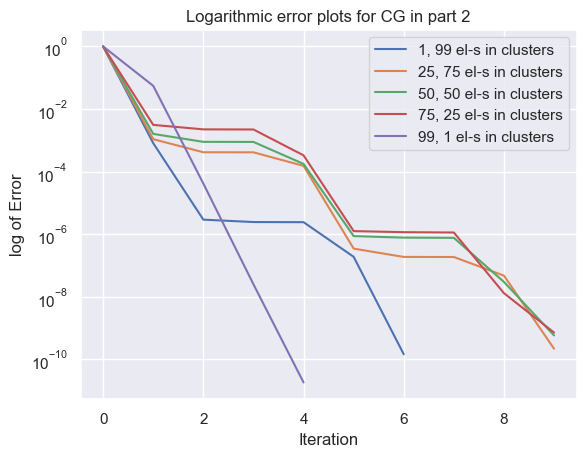

In [88]:

# Constants
d = 100
lower_bound = 1
upper_bound = 1000
sizes = [1,25,50,75,99]
p = 0.05

x_0 = np.random.rand(d)*3
for i, size in enumerate(sizes):
    eigen_values = np.array([])
    eigen_values = np.append(eigen_values, generate_eigen_values(lower_bound, p, size))
    eigen_values = np.append(eigen_values, generate_eigen_values(upper_bound, p, 100-size))

    A = generate_A(d, eigen_values)
    b = generate_b(d)
    x_sol = np.linalg.inv(A) @ b # d = 100, so not very hard to calculate
    
    def f(x):
        return 0.5 * x @ A @ x - b * x
    
    def grad(x):
        return A@x - b

    x, errors = conjugate_for_quadratic(f, grad, x_0, x_sol, A)
    
    plt.plot(range(len(errors)), errors)

plt.legend([f"{bound}, {100-bound} el-s in clusters" for bound in sizes])
plt.xlabel("Iteration")
plt.ylabel("log of Error")
plt.yscale('log')
plt.title("Logarithmic error plots for CG in part 2")

## Conclusion
Here we see that the performance is better when eigenvalues are in one cluster in comparison to other settings.\
Of course, when the majority is around 10, the result are better than when majority around some big number\
We see that more eigenvalues are in cluster of high number - more platos in length (same as in the first experiment)

Next, I will vary the number of clusters

Text(0.5, 1.0, 'Logarithmic error plots for CG in part 3')

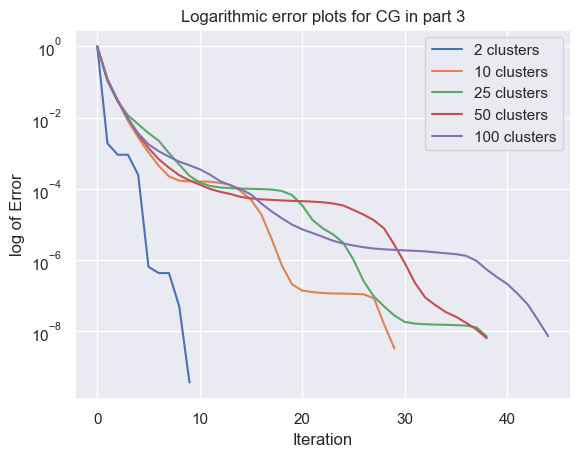

In [122]:
# Constants
d = 100
lower_bound = 1
upper_bound = 1000
cluster_sizes = [2, 10, 25, 50, 100] 
p = 0.05

x_0 = np.random.rand(d)*3
for i, cluster_size in enumerate(cluster_sizes):
    
    eigen_values = np.array([])
    
    step = 999/(cluster_size-1)
    centers = [int(round(1+x*step)) for x in range(cluster_size)]
    num_els_in_cluster = int(100 / cluster_size)
    
    for mid in centers:
        eigen_values = np.append(eigen_values, generate_eigen_values(mid, p, num_els_in_cluster))

    A = generate_A(d, eigen_values)
    b = generate_b(d)
    x_sol = np.linalg.inv(A) @ b # d = 100, so not very hard to calculate
    
    def f(x):
        return 0.5 * x @ A @ x - b * x
    
    def grad(x):
        return A@x - b

    x, errors = conjugate_for_quadratic(f, grad, x_0, x_sol, A)
    
    plt.plot(range(len(errors)), errors)

plt.legend([f"{cluster_size} clusters" for cluster_size in cluster_sizes])
plt.xlabel("Iteration")
plt.ylabel("log of Error")
plt.yscale('log')
plt.title("Logarithmic error plots for CG in part 3")

## Conclusion
We see that generally less clusters - better, but the difference is significant in comparison to very low number of clusters. 10 clusters out of 100 possible is already a big number. 

Also we see that more clusters we have - smoother the error plot is. So, for 100 clusters plot is very smooth, for 2 and 10 clusters the plot often changes from flat to fastly decreasing.

__Problem 4. (25 points)__ Now let us talk about Newton method and quasi-Newton methods.

__а). (5 points)__ For the regression problem, implemnt and run Newton method. Does it converge? If not, try running the gradient descent method for several iterations first before using Newton method. Vary the number of gradient descent steps. Plot the value of convergence criterion versus iteration number for the combination of gradient descent and Newton method with different number of gradient descent steps. Make a conclusion. $\textbf{Comment : 3 points}$

In [34]:
from numpy.linalg import inv

def gradient_descent_util(f, grad_function, w_0, step,  K=10):
    '''
    Utility function for newton's method. Does not take epsilon, because algorithm end not in this function
    f - target function
    grad_function - function of gradient for function above
    w_0 - start point for iterations
    K - number of gradient descent iterations

    Returns estimated point and errors
    '''
    w_k = w_0.copy()
    errors = []
    for k in range (K):
        w_k_prev = w_k.copy() # Saving previous position to calculate error
        
        grad = grad_function(X_train, y_train, w_k)
        w_k = w_k - step * grad
        
        error = np.linalg.norm(w_k - w_k_prev)
        errors.append(error)
            
        assert error < 1000
        
    return w_k, errors
    
def newton(f, grad_function, hessian_function, w_0, K_GD = 0, step_GD = 0.8, K_NM = 100, eps = 1e-5):
    '''
    Newton's method for optimization
    f - target function
    grad_function - Gradient
    hessian_function - Hessian
    w_0 - start point
    K_GD - number of iterations before newton by gradient descent. 0 by default
    step_GD - constant as the step for gradient descent
    K_NM - number of iterationf after gradient descent. 1000 by default
    eps - error to achieve

    Returns estimated point and errors
    '''
    w_k = w_0.copy()
    errors = []
    
    if K_GD >0: # gradient descent if needed
        w_k, errors_GD = gradient_descent_util(f, grad_function, w_k, step_GD, K = K_GD)
        errors.extend(errors_GD)
    
    for k in tqdm(range(K_NM)): # newton method
        w_k_prev = w_k.copy()
        hessian = hessian_function(X_train, y_train, w_k)
        grad = grad_function(X_train, y_train, w_k)
        inverted_hessian = inv(hessian) # I am said we can use implemented inverse in this task
        
        w_k = w_k - inverted_hessian @ grad
        
        error = np.linalg.norm(w_k - w_k_prev)
        errors.append(error)
        if error < eps:
            break
        if error > 1000:
            break
            
    return w_k, errors
        

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.12it/s]


Text(0, 0.5, 'Error')

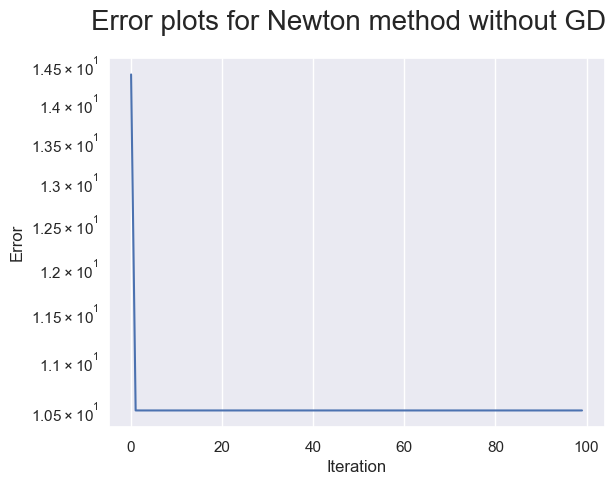

In [37]:
w_k, errors = newton(f, grad, hessian, w_0, K_NM = 100)
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Error plots for Newton method without GD', fontsize=20)

sns.lineplot(x = range(len(errors)), y=errors, ax = ax1)
ax1.set_xlabel("Iteration")
ax1.set_yscale("log")
ax1.set_ylabel("log of error")

$\textbf{Comment : It's wrong, why you stending still?}$

Here we see that method did not converge

  1%|▊                                                                                 | 1/100 [00:00<01:09,  1.42it/s]


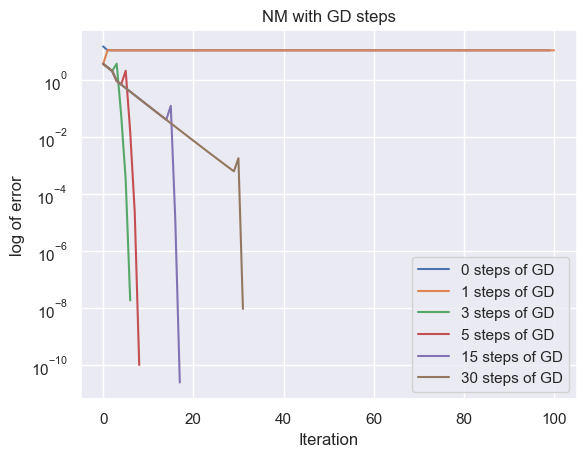

In [38]:
GD_iters = [0,1,3,5,15,30]

errors_in_GD_NM = []
for iter in GD_iters:
    w_k, errors = newton(f, grad, hessian, w_0, K_GD = iter, K_NM = 100)
    errors_in_GD_NM.append(errors)
    plt.plot(range(len(errors)), errors)
plt.title(f"NM with GD steps")
plt.xlabel("Iteration")
plt.ylabel("log of error")
plt.yscale("log")
plt.legend([f"{iter} steps of GD" for iter in GD_iters])

### Conclusion
Gradient descent allows newton method to converge. As we can see, even 1 step of GD was not enough in this case, but more leaded to convergence very quickly. Also we see, that more GD steps we take - less spikes become in size (remember yscale is logaritmic). Spikes are the transitions from GD to Netwon method, so they are ok.\
The best choise here is to have 3 steps of GD

__b). (7 points)__ Implement the quasi-Newton method BFGS. Use it to solve the regression problem. Add it to the plot from the previous point about Newton method. Make a conclusion. $\textbf{Comment : 7 points}$

In [39]:
def line_search(f, grad, x_0, p):
    '''
    wolfe conditions. Searching for such alpha that wolfe conditions are met
    f - function to use
    x_0 - starting point
    p - direction of searching
    grad - gradient function
    '''
    a = 1
    c1 = 1e-3
    c2 = 0.9 
    fx = f(X_train, y_train, x_0)
    x_k = x_0 + a * p 
    grad_0 = grad(X_train, y_train, x_0)
    grad_k = grad(X_train, y_train, x_k)
    while f(X_train, y_train,x_k) > fx + (c1*a*grad_0.T@p) or -grad_k.T@p > -c2*grad_0.T@p : # while wolfe conditions are not met
        a *= 0.5
        x_k = x_0 + a * p 
        grad_k = grad(X_train, y_train, x_k)
    return a

In [42]:
def BFGS(f, nabla, x_0, K = 100, eps = 1e-5):
    '''
    f - function to minimize
    grad - gradient
    x_0 - starting point
    K - number of iterations inside one search
    '''
    d = x_0.shape[0]
    H = np.eye(d) # initial guess of hessian, identity matrix
    x_k = x_0.copy()

    errors = []
    for k in tqdm(range(K)): 
        grad = nabla(X_train, y_train, x_k)
        p = -H @ grad # search direction
        alpha = line_search(f,nabla,x_k,p) # line search for alpha
        x_new = x_k + alpha * p 
        s = x_new - x_k # difference in x
        y = nabla(X_train, y_train, x_new) - grad # difference in gradients

        ro = 1 / (y.T @ s)
        H = (np.ones(d) - ro * s @ y.T) @ H @ (np.ones(d) - ro * y @ s.T) + ro * s @ s.T  # update of hessian
        
        error = np.linalg.norm(x_new - x_k)
        x_k = x_new
        errors.append(error)
        if error < eps:
            break
        if error > 1000:
            break
    return x_k, errors

  1%|▊                                                                                 | 1/100 [00:00<00:24,  4.02it/s]C:\Users\porlu\AppData\Local\Temp\ipykernel_11324\3724093376.py:5: RuntimeWarning: overflow encountered in exp
  gr += (y[i] * X[i].reshape(-1,1)) / ( 1 + np.exp(y[i] * (w.transpose() @ X[i])))
 13%|██████████▌                                                                      | 13/100 [01:55<12:49,  8.85s/it]


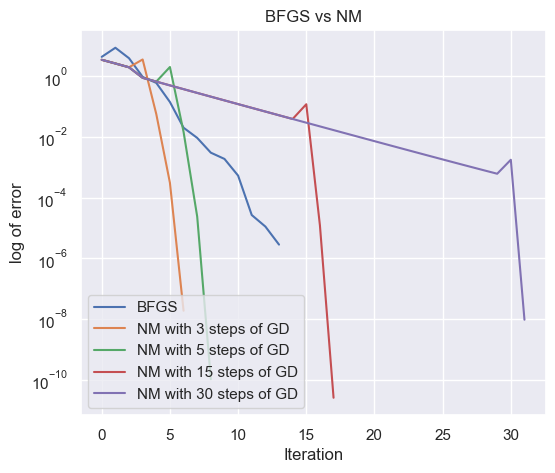

In [43]:
w_k, errors_BFGS = BFGS(f, grad, w_0, K = 100)
plt.figure(figsize = (6,5))
plt.plot(range(len(errors_BFGS)), errors_BFGS)
for errors in errors_in_GD_NM[2:]: # first 2 did not converge, so skipped them
    plt.plot(range(len(errors)), errors)

plt.title(f"BFGS vs NM")
plt.xlabel("Iteration")
plt.ylabel("log of error")
plt.legend(["BFGS"] + [f"NM with {iter} steps of GD" for iter in GD_iters[2:]])
plt.yscale("log")

### Conclusion
BFGS converged later than the NM with GD steps. Also wee see that BFGS converges very smoothly, without fallings.

__c). (13 points)__ Let us again depart from regression and consider a one-dimensional minimization problem:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}
Solve this problem using Newton method. Draw convergence plots of the method for two different starting points $x^0 = 1.3$ and $x^0 = 1.5$. Make a conclusion.

To achieve convergence of Newton method it is not necessary to resort to using another method as a stratum method. Realize two modifications of Newton method: damped (adding a step) and cubic Newton method (see [paper](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Do these methods solve the convergence problem of Newton method for the starting point $x^0 = 1.5$? In the damped method, try taking a step from $0.5$ to $1$. Draw the convergence plots. Make a conclusion. $\textbf{Comment : 13 points}$

Calculating the first and second derivatives, we obtain: (I think I can ommit exact calculating for 8th school class)
\begin{equation}
f'(x) = arctan x
\end{equation}
\begin{equation}
f''(x) = \frac{1}{x^2+1}
\end{equation}

Since 2nd derivative is positive, we have convex function. By setting first derivative to zero, obtain that the minimum at point $x^* = 0$\
I will use it for error calculation

In [1]:
def f(x : float):
    return x * np.arctan(x) - 0.5 * np.log(1 + x**2)
    
def first_deriv(x : float):
    return np.arctan(x)
    
def second_deriv(x : float):
    return 1 / (1 + x**2)

In [64]:
def damped_newton(f, grad_function, hessian_function, x_0,x_sol, K_NM = 1000, eps = 1e-5, damped_step = 1):
    '''
    Newton's method for optimization
    f - target function
    grad_function - Gradient
    hessian_function - Hessian
    x_0 - start point
    K_NM - number of iterations
    eps - error to achieve
    damped_step - step for damped version. 

    Returns estimated point and errors
    '''
    x_k = x_0
    errors = []
    
    for k in range(K_NM): # newton method
        hessian = hessian_function(x_k)
        grad = grad_function(x_k)
        inverted_hessian = 1 / hessian
        
        x_k = x_k - damped_step * inverted_hessian * grad
        
        error = np.linalg.norm(x_k - x_sol)**2
        errors.append(error)
        if error < eps:
            break
        if error > 1000:
            break
            
    return x_k, errors

Text(0, 0.5, 'Error')

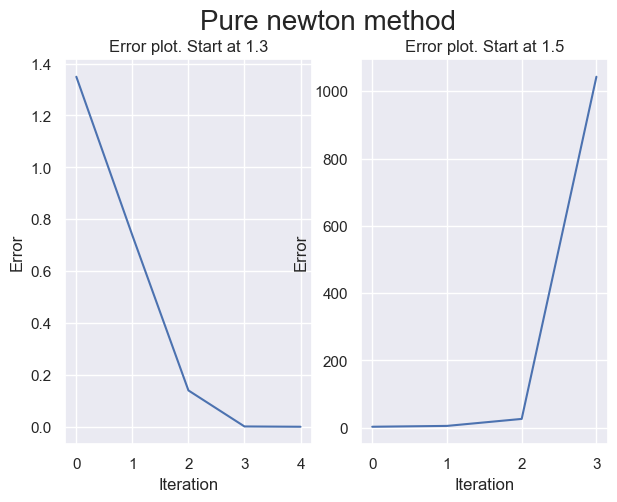

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(7)
fig.suptitle('Pure newton method', fontsize=20)

x_sol, errors = damped_newton(f, first_deriv, second_deriv, 1.3,0, 100)
sns.lineplot(x=range(len(errors)), y=errors, ax = ax1)
ax1.set_title(f"Error plot. Start at 1.3")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Error")

x_sol, errors = damped_newton(f, first_deriv, second_deriv, 1.5,0, 100)
sns.lineplot(x=range(len(errors)), y=errors, ax = ax2)
ax2.set_title(f"Error plot. Start at 1.5")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Error")

### Conslusion
We see that newtons method converges for 1.3 starting point and diverges for 1.5

Next, I will try the damped algorithm on 1.5 starting point with different steps

### Damped newton method

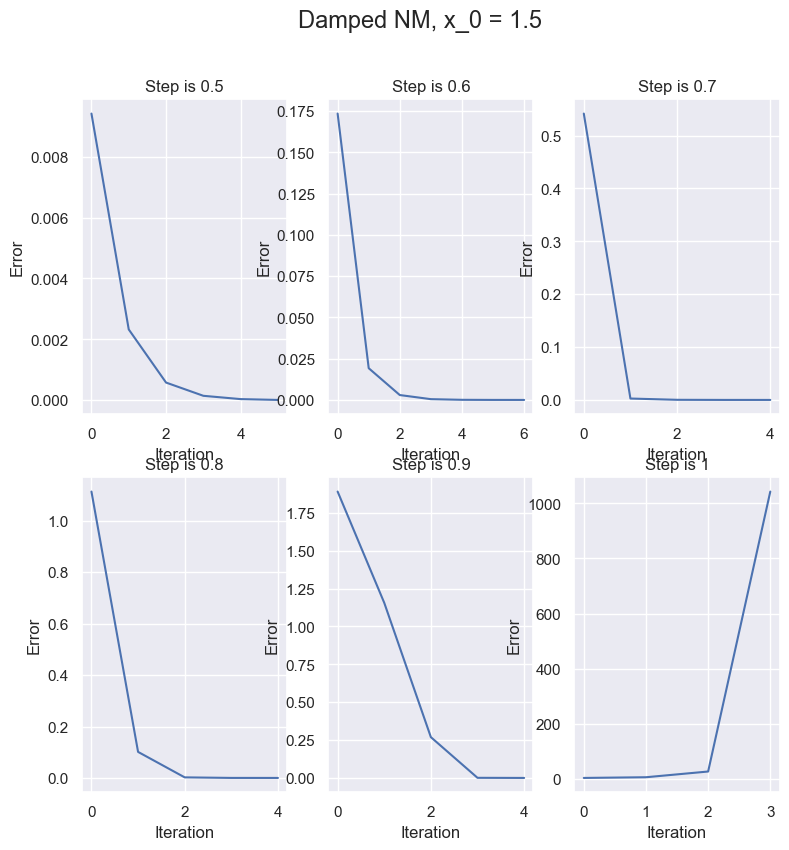

In [67]:
steps = [0.5, 0.6,0.7,0.8,0.9,1]

fig, axes = plt.subplots(2, 3)
fig.set_figheight(9)
fig.set_figwidth(9)
fig.suptitle('Damped NM, x_0 = 1.5', fontsize=17)

for step_size, ax in zip(steps, [ax for sublist in axes for ax in sublist]):
    x_sol, errors = damped_newton(f, first_deriv, second_deriv, 1.5,0, damped_step = step_size,K_NM=100)
    sns.lineplot(x = range(len(errors)), y = errors, ax = ax)
    ax.set_title(f"Step is {step_size}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Error")

### Conclusion
Newton method without any step is diverging, but using any step from [0.5, 1) make algorithm converging. What is more, algorithm converges in the same amount of iterations, but the rate of convergence was the best and very different for the case of step = 0.5. 

### Cubic newton method

According to the paper, cubic newton method involves the cubic regularization for newton's method.
We have iterative algorithm:
\begin{equation}
x_{k+1} \in \arg \min_y (f(x) + \langle f'(x), y-x\rangle + 0.5 \langle f''(x)(y-x), y-x\rangle + \frac{L}{6}||y-x||^3 )
\end{equation}

By formula 2.5, 2.7 from paper, solution to argmin equvalent to solution of the following system (M is replaced by Lipschitz constant L for the second derivative):
\begin{eqnarray}
\begin{cases}
f'(x) + f''(x)(y-x) + 0.5L||y-x||(y-x) = 0\\
f''(x) + 0.5L||x-y||I \succeq0
\end{cases}
\end{eqnarray}
Simplify it by noting that we work with scalars. Also, change (y-x) = t. Then, the solution for $x_{k+1}$ would be $x_k + t$. t like a change between current position and the target position

\begin{eqnarray}
\begin{cases}
f'(x) + f''(x)t + 0.5L|t|t = 0\\
f''(x) + 0.5L||t|| \ge 0
\end{cases}
\end{eqnarray}

As stated above, 2nd derivative is always positive, therefore the second inequality always holds, and the left parts is always $\ge 0$, so we have unique solution for the first equation. (taken from paper)\
Lipschitz constant for 2nd derivative is calculated by definition. 2nd derivative is denoted by H

\begin{eqnarray}
&|H(x) - H(y)| = |\frac{1}{y^2+1} - \frac{1}{x^2+1}| = \frac{|x+y||x-y|}{(y^2+1)(x^2+1)} \le L|x-y|\\
&\implies L = max \frac{|x+y|}{(y^2+1)(x^2+1)}
\end{eqnarray}
Using derivatives for both coordinates both $x,y \ge 0$ due to the property of eveness(четность), obtain that L is $\frac{9}{8\sqrt{3}}$ and this value is unique.


__Problem 5. (5 points)__ It remains to combine the results obtained in Problems 1-4. For this purpose, let us remember that the original regression problem is a machine learning problem and that the linear model $g$ can be used to predict the values of labels $y$. How do we use the final model for prediction? After answering the question, make predictions on a test sample $X_{test}$. Compare with the actual $y_{test}$ labels. The number of correctly guessed labels is the accuracy/accuracy of the model. Compare the gradient descent method, heavy ball method, accelerated gradient method, Fletcher-Reeves method, Polak-Ribier method, Newton method, BFGS. Construct two plots: the value of convergence criterion from running time and the prediction accuracy from running time. Make a conclusion. $\textbf{Comment : 3 points}$

To use model for prediction, we should:
1. Train it using any of optimizers above, train data
2. Apply the model to test data and obtain predictions
To make predictions, I will use BFGS.

In [73]:
w_k , _ = polak_ribier(f, grad, w_0, K = 100, restart_frequency = 10)

 22%|█████████████████▊                                                               | 22/100 [00:05<00:20,  3.75it/s]


In [81]:
corrected = 0
total = X_test.shape[0]
for i in range(X_test.shape[0]):
    prediction = w_k.T @ X_test[i]
    true = y_test[i]
    if true * prediction > 0:
        corrected+=1
print(f"Accuracy is {corrected/total*100}%")

Accuracy is 89.96923076923076%


Text(0.5, 1.0, 'Comparison of algorithms')

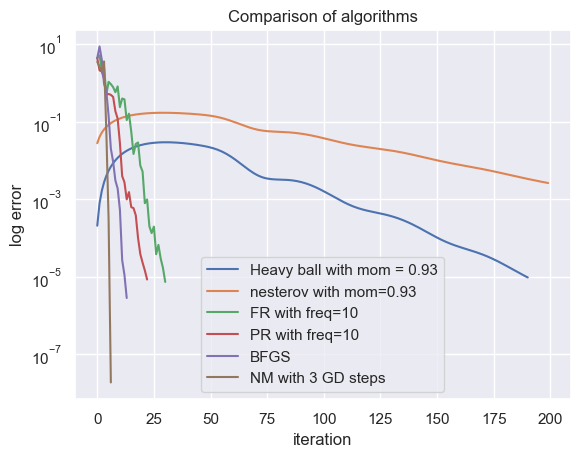

In [85]:
plt.subplot()
plt.plot(range(len(errors_heavy_ball[0])), errors_heavy_ball[0])
plt.plot(range(len(errors_nesterov[0])), errors_nesterov[0])
plt.plot(range(len(errors_FR[1])), errors_FR[1])
plt.plot(range(len(errors_PR[1])), errors_PR[1])
plt.plot(range(len(errors_BFGS)), errors_BFGS)
plt.plot(range(len(errors_in_GD_NM[2])), errors_in_GD_NM[2])
plt.legend(["Heavy ball with mom = 0.93", "nesterov with mom=0.93", "FR with freq=10","PR with freq=10", "BFGS", "NM with 3 GD steps"])
plt.xlabel("iteration")
plt.ylabel("log error")
plt.yscale("log")
plt.title("Comparison of algorithms")

$\textbf{Comment : Where second plot?}$

### Conclusion
Newton method after 3 gradient descent steps is the winner.\
Heavy ball and nesterov acceleration methods did poor work in terms of number of iterations.\
Other methods did a quite well job with +- equal iterations number taken.

Note that plots do not start from the same point, since plots start from the error between first and zeroth points, so it depends on first point given by algorithm.